<a href="https://colab.research.google.com/github/AdityaChaudhary/CaptchaSolver/blob/master/Single_Digit_CAPTCHA_Solver_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Digit CAPTCHA Solver

### `Using TensorFlow`

#### Contributors

[Aditya Chaudhary](https://www.linkedin.com/in/chaudharyaditya/)


[Jyoti Yadav](https://www.linkedin.com/in/jyoti-yadav-b8232969/)



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AdityaChaudhary/CaptchaSolver/blob/master/Single_Digit_CAPTCHA_Solver_Classifier.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AdityaChaudhary/CaptchaSolver/blob/master/Single_Digit_CAPTCHA_Solver_Classifier.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

CAPTCHA(Completely Automated Public Turing test to tell Computers and Humans Apart) were develped in 2003 and have become more and more complicated over the years. Filling CAPTCHA is a very annoying task especially when it says "Try Again!". But sooner or later,  every devil dies. And this task can be done by machine learning in a very efficient way. 

Lets start with the very basic CAPTCHA involving only a single number lying between 0 to 9. The intent is to build an accurate model that takes CAPTCHA as input and decodes it in order to spit out the number written in the image. Let the war begin!

---







## Install Python's `captcha` library to generate CAPTCHAs

Lets begin by some preperations involving the ways to create desired sample of data. 

Installing captcha library makes the accessibility of the dataset consisting of required captcha simpler. 

In [1]:
!pip install captcha

    100% |████████████████████████████████| 102kB 2.7MB/s 


## Create directories to Store images

This step involves the creation of a directory where the desired dataset will be stored. In total, 10 folders have been created for respective digits in the captcha.

In [2]:
!rm -rdf images
!mkdir images
!mkdir images/{0..9}
!ls images/

0  1  2  3  4  5  6  7	8  9


## Generate CAPTCHA images

The process creates a sample of randomly chosen 50000 captcha. The randomness factor erradicates any sample bias that could get into the picture while creating the sample. This is important so that the sample generated here is a true representative of the overall population. 

In [3]:
from captcha.image import ImageCaptcha
import random
from IPython.display import Image, display
from tqdm.autonotebook import tqdm
import time



image = ImageCaptcha()

dir = "images/"

image_count = 50000

for x in tqdm(range(image_count)):
  r = random.randint(0, 9)
  data = image.generate(str(r))
  #print(data)
  ts = time.time()
  path = dir + str(r) + "/" + str(ts) + '.png'
  image.write(str(r), path)
  #print(r)
  #display(Image(path))
  


/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Import the required libraries and setup TF

In order to perform the task, tensorflow is used. It is a machine learning open source library that makes the numerical computation easier and efficient. And this section is to import tensorflow and a few more helper librariess involving numpy and matplotlib. 

In [4]:
from __future__ import absolute_import, division, print_function
import pathlib

import tensorflow as tf
tf.enable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
import random

tqdm.tqdm = tqdm.auto.tqdm



print(tf.__version__)
tf.enable_eager_execution()  


AUTOTUNE = tf.data.experimental.AUTOTUNE

data_root = "images/"
data_root = pathlib.Path(data_root)
#print(data_root)

#for item in data_root.iterdir():
#  print(item)



all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print(image_count)

print(all_image_paths[:10])



1.13.1
50000
['images/0/1553375015.4316578.png', 'images/6/1553375110.2629688.png', 'images/8/1553375114.128983.png', 'images/9/1553375134.1079245.png', 'images/4/1553375041.9238036.png', 'images/6/1553375239.7701328.png', 'images/9/1553375197.6375408.png', 'images/5/1553375166.9490063.png', 'images/2/1553375196.1990516.png', 'images/1/1553375186.8565955.png']


### Let's display some of the CAPTCHA images

Lets have a look at the devil we are to deal with!

Representing the type of CAPTCHA that will be decoded by the algorithm presented in this tutorial.

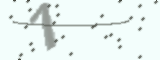

Value 1



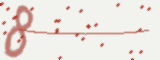

Value 8



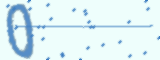

Value 0



In [5]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Value " + str(image_rel).split('/')[0]
    
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()
  

## Resize and medianBlur the images

Before applying machine learning algorithm to any dataset it is crucial to analyse data by naked eyes and reduce the noise in the data. 

It is evident that there is a lot of noise in the CAPTCHA images presented above which can mislead the algorithm. Here, the data cleaning job is performed by smoothening images using medianBlur and converting into it greayscale. 

After this, Canny edge detection algorithm is applied to smoothened image in order to extract useful structural information from the image and reduce the amount of data to be processed by the algorithm. This process drastically reduces the noise in the data and increases the efficiency of the machine learning technique. 

In [6]:
import cv2
from tqdm.autonotebook import tqdm

for path in tqdm(all_image_paths):
  #p = random.choice(all_image_paths)
  #print(path)
  img = cv2.imread(path)
  # smoothing the image
  
  img = cv2.medianBlur(img, 5)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  x=0
  y=0
  h=70
  w=70
  img = img[y:y+h, x:x+w]



  #edge detection    
  img = cv2.Canny(img, 100, 350)
  cv2.imwrite(path, img)
  
  #n_white_pix = cv2.countNonZero(img)
  
  #print(p)
  #print(n_white_pix)
  
  #display.display(display.Image(img))

### Let's view some images which we filtered above

After applying the above techniques, the final images are ready to be processed. And these images look like this:

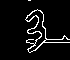

Value 3



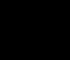

Value 6



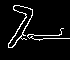

Value 7



In [7]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Value " + str(image_rel).split('/')[0]
    
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()
  

## Create labels from the directory names

Since, supervised learning is used here. This involves the creation of labels for each image to be processed. Based on the image and label combination, algorithm will learn the nomenclature for the digits present in the image. This is how we all learned numbers by looking at images and the labels for the same. 

In [8]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print(label_names)


label_to_index = dict((name, index) for index,name in enumerate(label_names))
print(label_to_index)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [9]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print(all_image_paths[:10])
print("First 10 labels indices: ", all_image_labels[:10])



['images/0/1553375015.4316578.png', 'images/6/1553375110.2629688.png', 'images/8/1553375114.128983.png', 'images/9/1553375134.1079245.png', 'images/4/1553375041.9238036.png', 'images/6/1553375239.7701328.png', 'images/9/1553375197.6375408.png', 'images/5/1553375166.9490063.png', 'images/2/1553375196.1990516.png', 'images/1/1553375186.8565955.png']
First 10 labels indices:  [0, 6, 8, 9, 4, 6, 9, 5, 2, 1]


## Load labels and images in TF datasets

In order to make tensorflow work on these images, it is essential to decode png files into a tensor of format uint8 or uint16. This is done using function "tf.image.decode_png". The later process involves normalisation of the image after resizing it. 

Once the images are converted into a suitable format to be read and processed by tensorflow function, images are mapped to the corresponding labels. 

In [10]:
def preprocess_image(image):
  image = tf.image.decode_png(image, channels=1)
  #image = tf.image.rgb_to_grayscale(image)
  image = tf.image.resize_images(image, [70, 70])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

"""
import matplotlib.pyplot as plt

print(len(all_image_paths))
r = random.randint(0,1000)
#print r
image_path = all_image_paths[r]
label = all_image_labels[r]

print(image_path, label)

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
plt.xlabel(caption_image(image_path))
plt.title(label_names[label].title())
print()
"""

'\nimport matplotlib.pyplot as plt\n\nprint(len(all_image_paths))\nr = random.randint(0,1000)\n#print r\nimage_path = all_image_paths[r]\nlabel = all_image_labels[r]\n\nprint(image_path, label)\n\nplt.imshow(load_and_preprocess_image(image_path))\nplt.grid(False)\nplt.xlabel(caption_image(image_path))\nplt.title(label_names[label].title())\nprint()\n'

In [11]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [12]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
image_ds

<DatasetV1Adapter shapes: (70, 70, 1), types: tf.float32>

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

#for label in label_ds.take(10):
#  print(label_names[label.numpy()])
  

In [14]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
print('image shape: ', image_label_ds.output_shapes[0])
print('label shape: ', image_label_ds.output_shapes[1])
print('types: ', image_label_ds.output_types)
print()
print(image_label_ds)

image shape:  (70, 70, 1)
label shape:  ()
types:  (tf.float32, tf.int64)

<DatasetV1Adapter shapes: ((70, 70, 1), ()), types: (tf.float32, tf.int64)>


## Let's divide the dataset into train set and test set

For validation purpose, the algorithm is to be tested on some data. Therefore, the entire dataset of 50000 data points is divided into 80-20 ratio. This implies that the model will be trained on 40000 data points and test will be perfomed on 10000 data points. For a better result, the data is shuffled before spliting it into training and test datasets. 

Here the batch size is taken to be 32. This implies that within each iteration(epoch), the model will be trained in batch of 32 datapoints(1250 steps per iteration). 

In [15]:
BATCH_SIZE = 32
num_examples = image_count

#https://stackoverflow.com/questions/48213766/split-a-dataset-created-by-tensorflow-dataset-api-in-to-train-and-test
train_size = int(0.8 * num_examples)
test_size = int(0.2 * num_examples)


# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=num_examples)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
#ds = ds.prefetch(buffer_size=AUTOTUNE)
ds


train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)


print(train_ds.output_shapes)
print(train_size)
print(test_ds.output_shapes)
print(test_size)
#BATCH_SIZE = 32
#train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
#test_dataset = test_dataset.batch(BATCH_SIZE)

(TensorShape([Dimension(None), Dimension(70), Dimension(70), Dimension(1)]), TensorShape([Dimension(None)]))
40000
(TensorShape([Dimension(None), Dimension(70), Dimension(70), Dimension(1)]), TensorShape([Dimension(None)]))
10000


## Define the Keras Sequential Model

Keras sequential model helps creating the model layer by layer. In this model, three layers are chosen involving one hidden laye with below mentioned specifications. 

1. Input Layer: Flatten the images: 70x70 2D image to 1D array
2. Hidden Layer: 200 neurons Dense with **relu** activation function
3.  Output Layer: 10 neurons with **softmax** activation function for classification(0 to 9)



In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(70, 70, 1)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

## Compile the model

1. Optimiser: **adam**
2. Loss function: **sparse_categorical_crossentropy**

In order to test the performance of the model, accuracy is calculated. Accuracy depicts the percentage of images classified correctly. 

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

Five iterations are performed here and within each iterations 1250 steps are performed. As it can be seen each iteration loss is going down and accuracy is increasing. Given the dataset generated in this round, the 97 percent accuracy is achieved with a loss below 0.1. 

In [18]:
model.fit(train_ds, epochs=5, steps_per_epoch=math.ceil(train_size/BATCH_SIZE))

Epoch 1/5
1250/1250 [==============================] - 32s 26ms/step - loss: 0.8158 - acc: 0.7388
Epoch 2/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.3077 - acc: 0.9065
Epoch 3/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.1861 - acc: 0.9430
Epoch 4/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.1116 - acc: 0.9653
Epoch 5/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.0827 - acc: 0.9745


## Let's test our Model

The model is run on the test data in order to find whether the model is able to generalise the result to the other CAPTCHA as well(which were not a part of training set). Here, as well the loss is very low and the accuracy is matching with the training results. This indicates the absence of under or overfitting of the model.  

In [19]:
test_loss, test_accuracy = model.evaluate(test_ds, steps=math.ceil(test_size/32))
print('Accuracy on test dataset:', test_accuracy)
print('Loss on test dataset:', test_loss)

313/313 [==============================] - 327s 1s/step - loss: 0.0584 - acc: 0.9824
Accuracy on test dataset: 0.98242813
Loss on test dataset: 0.0584392548704627


## Visually test some Model predictions

This section of the tutorial takes a few observations and shows the corresponding true labels and predicted labels with the accuracy of prediction in each case. Here, red depicts the wrong label and blue depicts the corect label prediction. 

In [0]:
class_names = ['0', '1', '2', '3', '4', 
               '5',      '6',   '7',  '8',   '9']
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

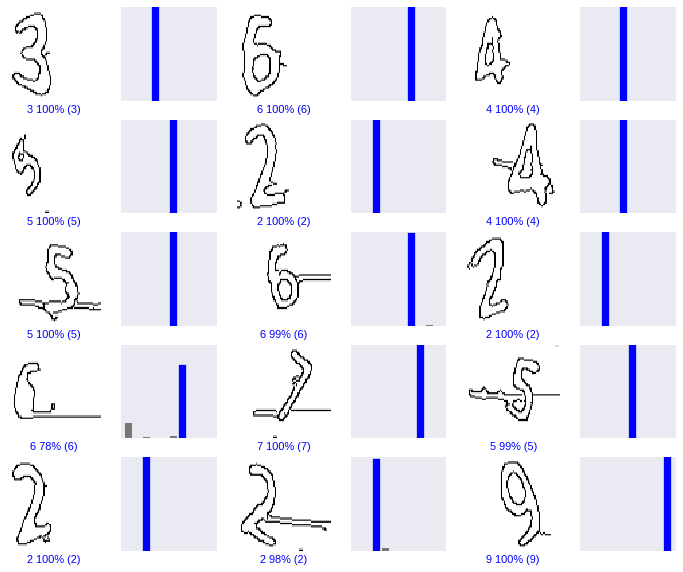

In [21]:
for test_images, test_labels in test_ds.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


All looks good. We'll be sharing some other models too. Stay tuned for more :)

---

